## Importando as bibliotecas

In [1]:
# Tratamento de dados
import numpy as np
import pandas as pd

# Tratamento de data
from datetime import date

# Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Carregando os dados

In [2]:
df_total = pd.read_csv('casos-brasil.csv')
df_total.tail()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
3957,31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
3958,31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
3959,31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
3960,31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
3961,31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


## Tratando os dados

In [3]:
# Retirando as linhas com valor total
df = df_total[df_total['estado'] != 'TOTAL']

# Alterando o tipo de dado da coluna data
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


## Visualizando os dados

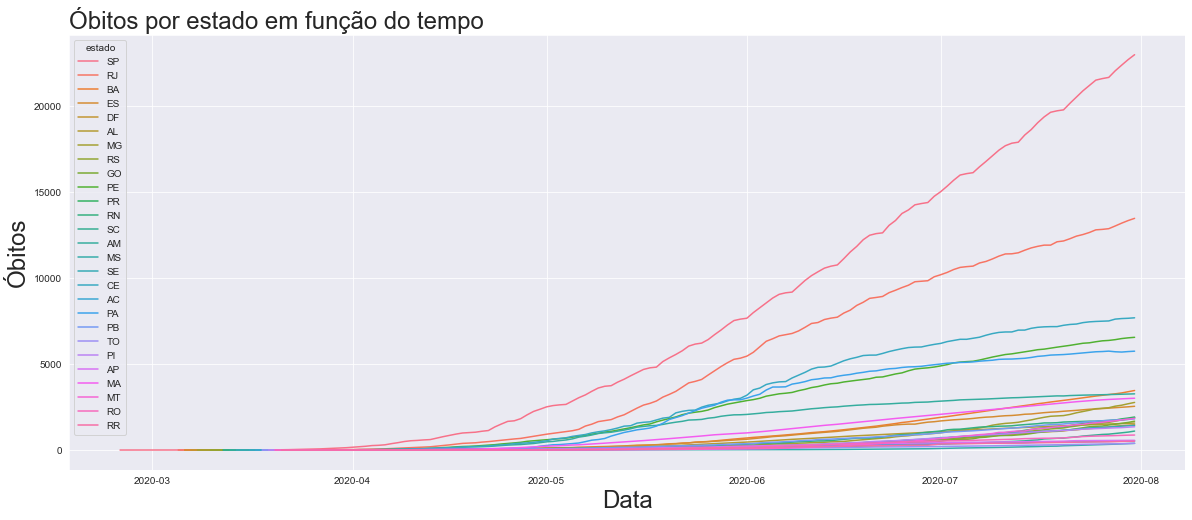

In [4]:
# sns.set_palette('dark')
sns.set_style('darkgrid')
ax = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
ax.figure.set_size_inches(20, 8)
ax.set_title('Óbitos por estado em função do tempo', loc='left', fontsize=24)
ax.set_xlabel('Data', fontsize=24)
ax.set_ylabel('Óbitos', fontsize=24)
plt.savefig('obitos_por_estados.png')
ax = ax

Analisando o gráfico percebemos que o comportamento de novos casos de COVID aparentemente seguem uma distribuição exponencial, o que pode ser extremamente perigoso, dado que, em algum momento no tempo, mesmo que com poucos casos de COVID, a situação pode já estar fora de controle. <p>
Para validar este comportamento exponencial, iremos plotar um gráfico monolog (base logarítimica em apenas um dos eixos), neste caso, aplicaremos a base log apenas no eixo Y (número de casos).

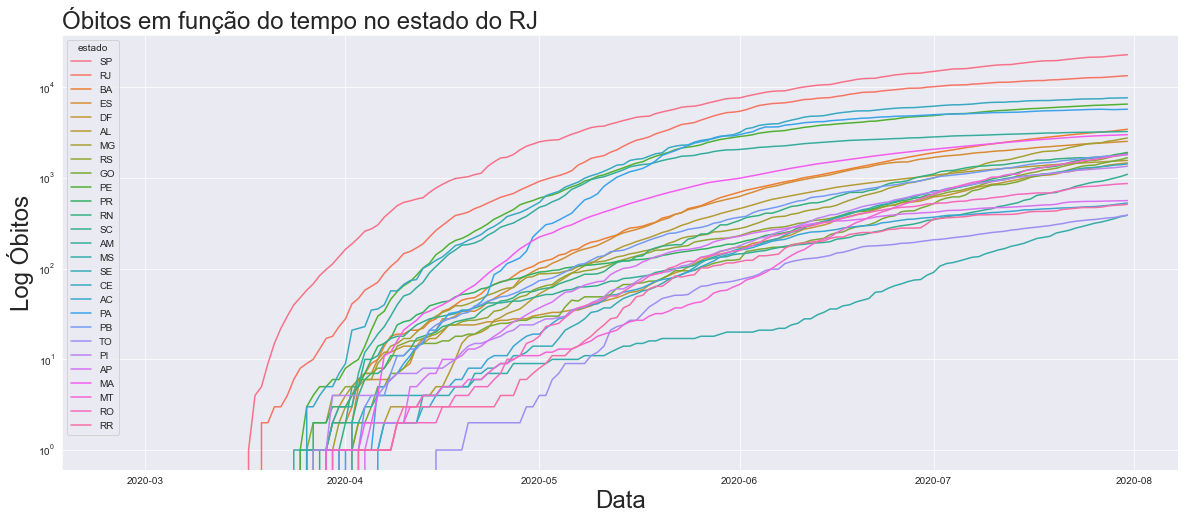

In [5]:
fig = sns.lineplot(x='data', y='Obitos', hue='estado', data=df)
fig.figure.set_size_inches(20, 8)
fig.set_title('Óbitos em função do tempo no estado do RJ', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log')

Percebe-se que o comportamento dos novos casos realmente seguem uma função exponencial, pois mesmo utilizando a base log no eixo Y, o número de casos não se aproxima de um platô (não se estabiliza), ou seja, com o decorrer do tempo, contiuamos a observar um crescimento no número de casos.

### Analisando os dados do RJ

In [6]:
df_rj = df[df['estado'] == 'RJ']
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,1,0.0,0.00579,0.0,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,1,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,2,0.0,0.01158,0.0,NaN,NaN,NaN,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,3,0.0,0.01738,0.0,NaN,NaN,NaN,NaN


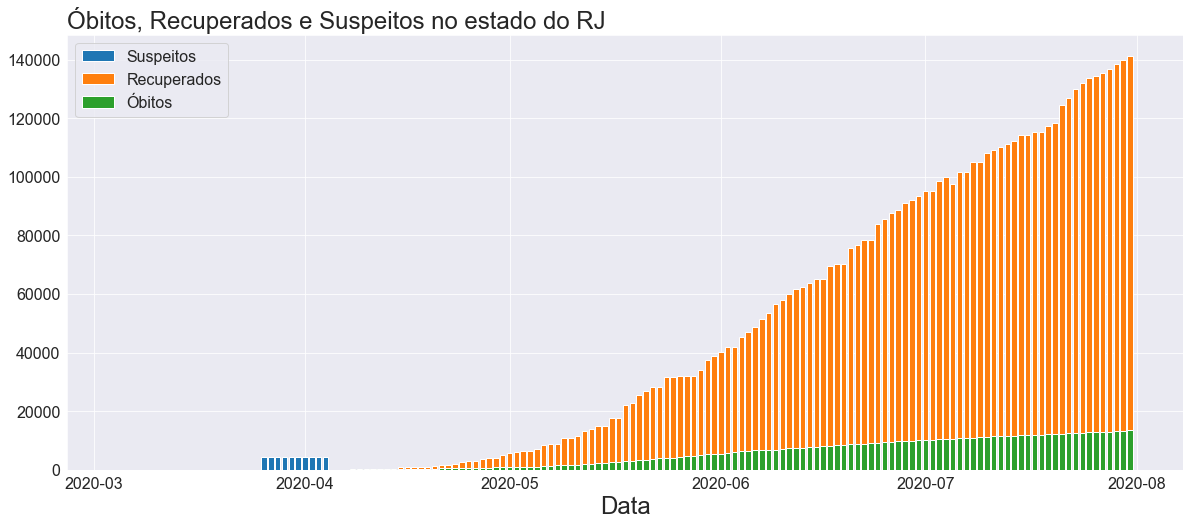

In [7]:
plt.figure(figsize=(20,8))
fig = plt.bar(x=df_rj.data, height=df_rj.suspeitos, label='Suspeitos')
plt.bar(x=df_rj.data, height=df_rj.recuperados, label='Recuperados')
plt.bar(x=df_rj.data, height=df_rj.Obitos, label='Óbitos')
plt.xlabel('Data', fontsize=24)
plt.title('Óbitos, Recuperados e Suspeitos no estado do RJ', fontsize=24, loc='left')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc=2, fontsize=16)
fig = fig

Como pode ser observado, os dados referentes aos suspeitos nos casos do RJ não estavam sendo registrados.

#### Analisando novos Óbitos e novos Casos no RJ

In [8]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(20, 6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90)
    # ax.set_xticklabels(labels=[str(i) for i in ax.get_xticks()], fontsize=14)
    # ax.set_yticklabels(labels=[str(i) for i in ax.get_yticks()], fontsize=14)

In [9]:
def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20, 6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo,loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

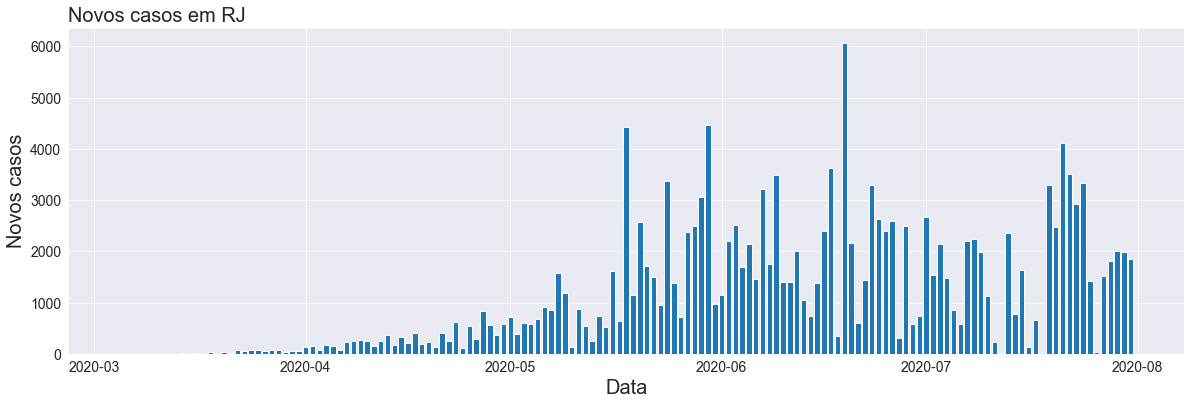

In [10]:
plotar_barra('Novos casos em RJ', 'Data', 'Novos casos', 'data', 'novosCasos', df_rj)

Pelo gráfico de barras, percebe-se uma grande variação no número de novos casos divulgados, esta variação deve-se a forma ...

In [11]:
df_rj['aceleracaoCasos'] = df_rj['novosCasos'].diff()
df_rj['aceleracaoObitos'] = df_rj['novosObitos'].diff()
df_rj['aceleracaoRecuperados'] = df_rj['recuperados'].diff()
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,0.0,0.00579,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,0.0,0.01158,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,0.0,0.01158,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,0.0,0.01738,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,0.0,0.01738,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN


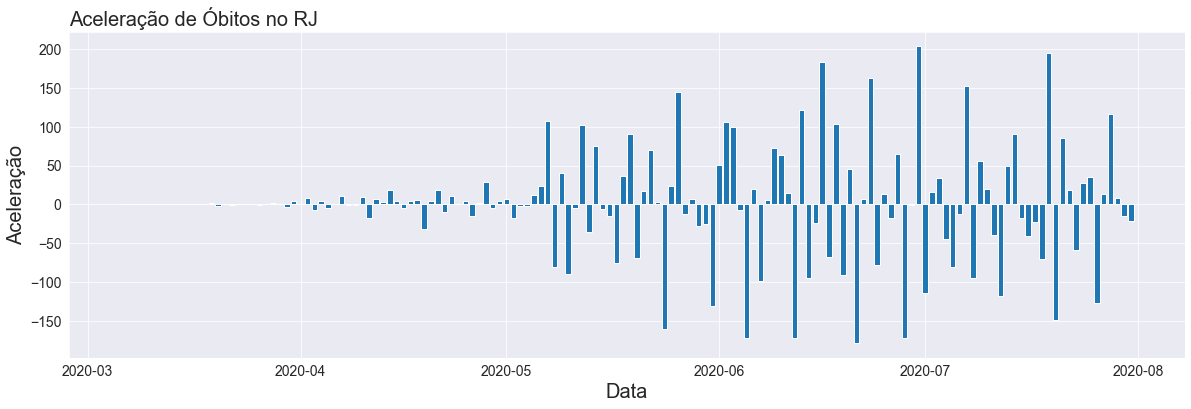

In [12]:
plotar_barra('Aceleração de Óbitos no RJ','Data','Aceleração','data','aceleracaoObitos',df_rj)

Pelo gráfico de acelarações do número de óbitos, percebemos algumas desacelerações ao longo do tempo (valor negativo), porém, isto não significa que de fato houve desaceleração, pois se olharmos apenas para o valor positivo em termos de maginitude, percebe-se que eles estão crescendo (barras cada vez maiores). Portanto, a variação entre os dias esta crescendo, ainda que esta variação em alguns dias seja negativa. Deve-se analisar também, o motivo destas desacelerações, que pode significar algumas sazonalidade nos dados.

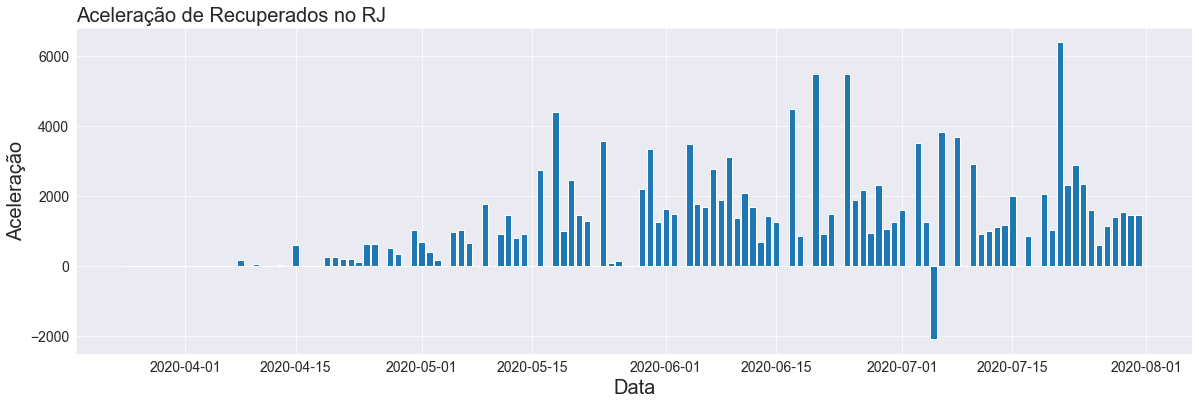

In [13]:
plotar_barra('Aceleração de Recuperados no RJ','Data','Aceleração','data','aceleracaoRecuperados',df_rj)

Para o gráfico acima não observamos valores negativos (exceto para 1 de julho, que deve ser analisado), pois fizemos a diferenciação a partir dos dados de Recuperados acumulado. Entretanto, ainda percemos uma tendência de crescimento olhando para a magnitude dos valores ao longo do tempo.

#### Utilizando média móvel para suavizar a sazonalidade

Realizando pesquisas sobre a forma como os dados são coletados e divulgados, descobrimos que esta sazonalidade refere-se apenas a forma como os dados são divulgados pelos hospitais. Durante o finais de semanas, os hospitais trabalham em plantão, o que gera uma demora na computação dos novos dados, e ao acumulo destes, quando então são divulgados no meio da semana. <p>
    
Para minimizar este efeito, iremos utilizar a média móvel. A média móvel serve também para remover sazonalidades curtas ou ruído nos dados. A média móvel permite que oscilações de período curto sejam suavizadas. Além disso, oscilações randômicas ou sem explicação realista para o modelo são removidas. <p>
    Criaremos uma de 7 dias para cobrir o período de uma semana e outra de 14 dias, referentes aos dias de isolamento de um paciente, apenas para verificar se existe alguma diferença.

"A média móvel nos permite analisar se o número de casos confirmados e o de mortes da covid-19 na última semana tem aumentado ou diminuído, de acordo com o mesmo intervalo de tempo das semanas anteriores." <p>
"A média móvel é uma das ferramentas usadas para comparar períodos iguais e, então, determinar se há um aumento médio ou um decrescimento médio da variável analisada."

In [14]:
df_rj['mediaObitos'] = df_rj.novosObitos.rolling(window=7, center=False).mean()
df_rj['mediaObitos_14'] = df_rj.novosObitos.rolling(window=14, center=False).mean()
df_rj.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
53,11,2020-03-10,Brazil,RJ,TOTAL,0,0,5,8,0,...,0.0,NaN,NaN,NaN,NaN,5.0,0.0,NaN,NaN,NaN
62,11,2020-03-11,Brazil,RJ,TOTAL,0,0,5,13,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
74,11,2020-03-12,Brazil,RJ,TOTAL,0,0,3,16,0,...,0.0,NaN,NaN,NaN,NaN,-2.0,0.0,NaN,0.0,NaN
89,11,2020-03-13,Brazil,RJ,TOTAL,0,0,0,16,0,...,0.0,NaN,NaN,NaN,NaN,-3.0,0.0,NaN,0.0,NaN
105,11,2020-03-14,Brazil,RJ,TOTAL,0,0,6,22,0,...,0.0,NaN,NaN,NaN,NaN,6.0,0.0,NaN,0.0,NaN


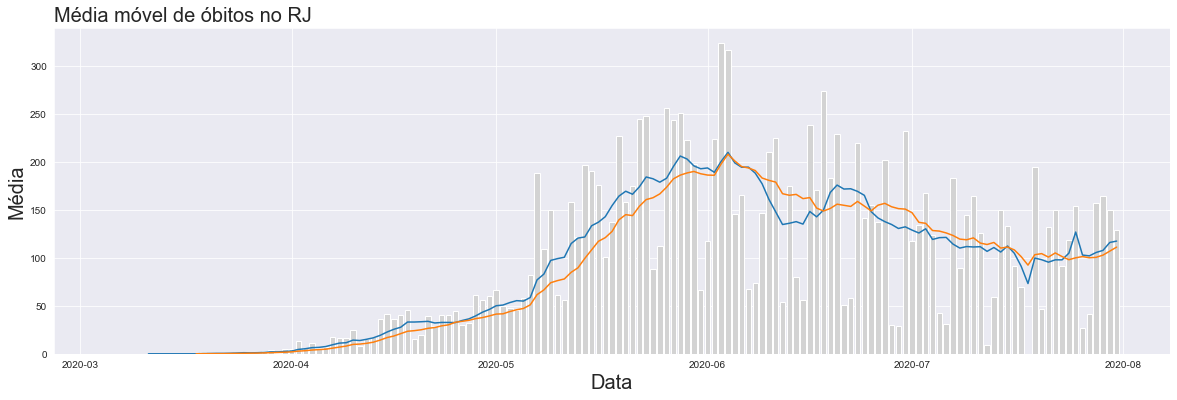

In [15]:
plotar_linha('Média móvel de óbitos no RJ','Data','Média','data','mediaObitos', df_rj, None)
plotar_linha('Média móvel de óbitos no RJ','Data','Média','data','mediaObitos_14', df_rj, None)
plt.bar(df_rj['data'], df_rj['novosObitos'], color='lightgrey')
plt.show()

#### Analisando a autocorrelação dos dados de Óbitos no RJ

In [16]:
from pandas.plotting import autocorrelation_plot

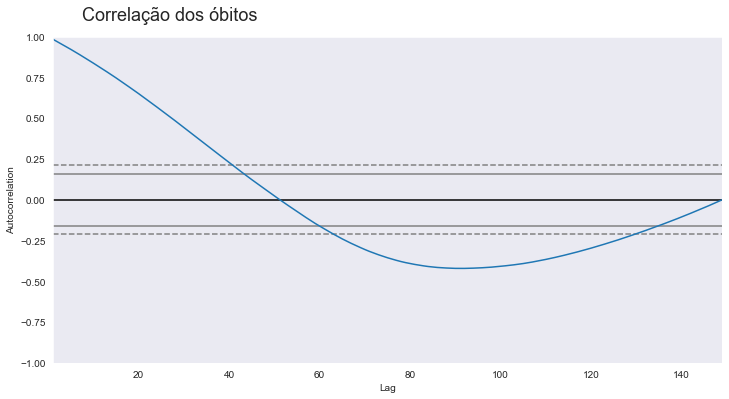

In [17]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_rj['Obitos'])
ax = ax

Percebe-se uma alta autocorrelação entre os dados de óbitos, comportamento que já era esperado dado que o número de óbitos cresce ao longo do tempo. Entretanto, devido ao comportamento exponencial, a autocorrelação diminui, alcançado um valor próximo de 0.25 com lag de 40 dias.

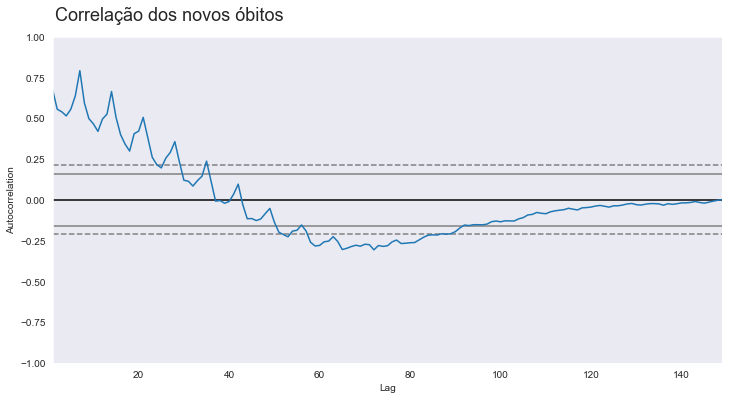

In [18]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_rj['novosObitos'])
ax = ax

Plotando o gráfico de autocorrelação para o número de novo Óbitos, percebemos a mesma presença da sazonalidade dos dados devido a forma como são divulgados, mas, a tendência continua a mesma.

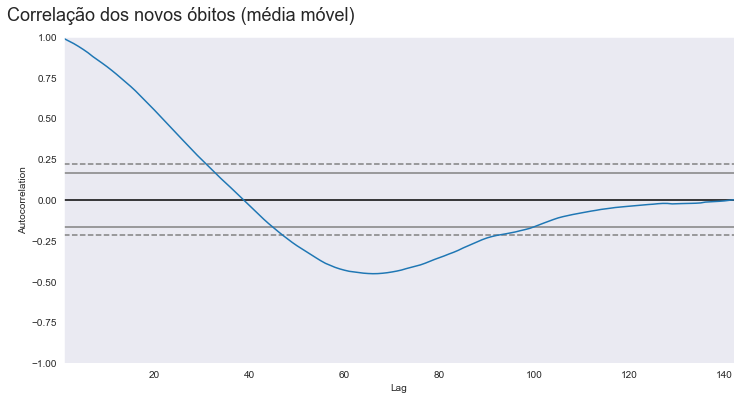

In [19]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_rj['mediaObitos'][7:])
ax = ax

Ao plotarmos a autocorrelação da média móvel, percebemos mais uma vez o efeito da sazonalidade sendo dissipado.

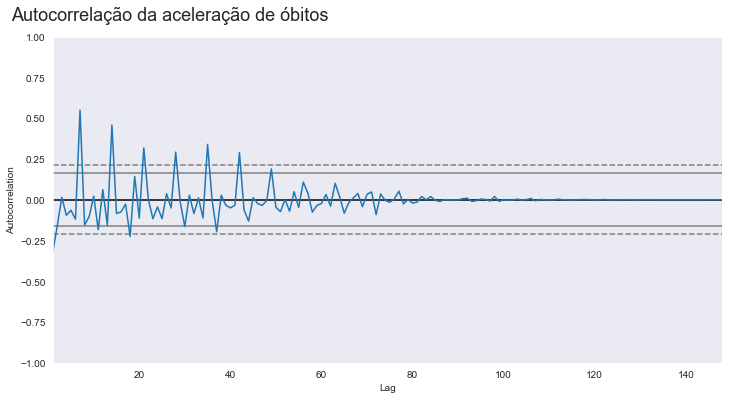

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Autocorrelação da aceleração de óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_rj['aceleracaoObitos'][1:])
ax = ax

Ao plotarmos o gráfico de autocorrelação da aceleração de Óbitos, percebemos a mesma presença de sazonalidade, e uma diminuição da autocorrelação ao longo do tempo. Isso acontece pois estamos trabalhando com o crescimento exponencial, e, dado que a autocorrelação mede uma relação linear, os valores de hoje não serão explicativos para valores dos próximos 2 ou 3 meses.

#### Analisando a relação de Óbitos ao longo do tempo

Iremos criar um novo dataframe agrupando os dados por dia da semana a fim de analisar melhor os efeitos de sazonalidade mensionados.

In [21]:
df_rj['mes'] = pd.to_datetime(df_rj['data'])
df_rj['dia_da_semana'] = df_rj['mes'].dt.day_name()
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mes,dia_da_semana
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,Thursday
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-03-06,Friday
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-03-07,Saturday
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-03-08,Sunday
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-03-09,Monday


In [22]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça','Wednesday':'Quarta',
                  'Thursday':'Quinta','Friday':'Sexta','Saturday':'Sabado',
                  'Sunday':'Domingo'}

In [23]:
df_rj['dia_da_semana'] = df_rj['dia_da_semana'].map(dias_traduzidos)

In [24]:
df_rj.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,...,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos_14,mes,dia_da_semana
18,10,2020-03-05,Brazil,RJ,TOTAL,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-05,Quinta
23,10,2020-03-06,Brazil,RJ,TOTAL,0,0,1,2,0,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,2020-03-06,Sexta
29,10,2020-03-07,Brazil,RJ,TOTAL,0,0,0,2,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-03-07,Sabado
37,11,2020-03-08,Brazil,RJ,TOTAL,0,0,1,3,0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,2020-03-08,Domingo
45,11,2020-03-09,Brazil,RJ,TOTAL,0,0,0,3,0,...,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,2020-03-09,Segunda


In [25]:
agrupados_rj = df_rj.groupby('dia_da_semana')['Obitos','novosObitos','aceleracaoObitos'].mean().round()

In [26]:
agrupados_rj['dia_da_semana'] = agrupados_rj.index
agrupados_rj.head(7)

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,4580.0,45.0,-56.0,Domingo
Quarta,4854.0,108.0,-14.0,Quarta
Quinta,4750.0,117.0,15.0,Quinta
Sabado,4536.0,101.0,6.0,Sabado
Segunda,4625.0,45.0,0.0,Segunda
Sexta,4846.0,96.0,-20.0,Sexta
Terça,4747.0,121.0,76.0,Terça


In [27]:
agrupados_rj = agrupados_rj.reindex(['Domingo','Segunda','Terça','Quarta','Quinta','Sexta',
                                    'Sabado'])
agrupados_rj

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,4580.0,45.0,-56.0,Domingo
Segunda,4625.0,45.0,0.0,Segunda
Terça,4747.0,121.0,76.0,Terça
Quarta,4854.0,108.0,-14.0,Quarta
Quinta,4750.0,117.0,15.0,Quinta
Sexta,4846.0,96.0,-20.0,Sexta
Sabado,4536.0,101.0,6.0,Sabado


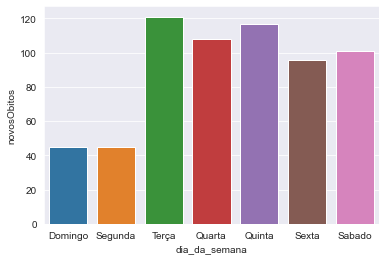

In [28]:
sns.barplot(agrupados_rj['dia_da_semana'], agrupados_rj.novosObitos)
plt.show()

Percebe-se que a quantidade informada de novos óbitos é menor durante os finais de semana, devido a questão dos plantões já mencionados.

In [29]:
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    df['semana'] = df['mes'].dt.week
    
    X = df[['diasemana','mês','diamês', 'semana']]
    
    if label:
        y = df[label]
        return X, y
    return X

In [30]:
X, y = criar_features(df_rj, label='Obitos')

In [31]:
df_final = pd.concat([X,y],axis=1)

In [32]:
df_final.head(10)

,diasemana,mês,diamês,semana,Obitos
18,3,3,5,10,0
23,4,3,6,10,0
29,5,3,7,10,0
37,6,3,8,10,0
45,0,3,9,11,0
53,1,3,10,11,0
62,2,3,11,11,0
74,3,3,12,11,0
89,4,3,13,11,0
105,5,3,14,11,0


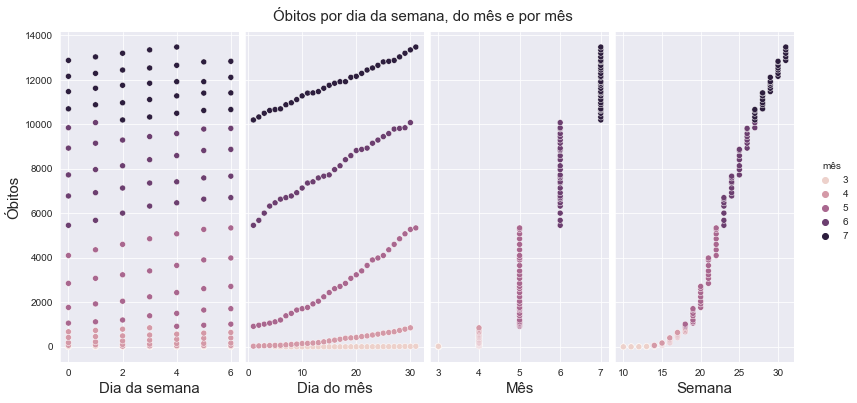

In [33]:
g = sns.pairplot(df_final.dropna(),
                hue='mês',
                x_vars=['diasemana','diamês','mês', 'semana'],
                y_vars='Obitos')

g.fig.set_size_inches(12,6)
g.axes[0,0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,3].set_xlabel('Semana', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, do mês e por mês', fontsize=15, y=1.02)
plt.show()

O primeiro plot confirma nossa hipóstese sobre a sazonalidade dos dados durante a semana, na medida em que observamos um acumulo de novos óbitos notificados nos dias do meio da semana. <p>
O segundo e terceiro plot mostram o crescimento exponencial da pandemia, mas observamos também uma pequena desaceleração. No segundo plot, observamos que a reta tem cada vez mais uma inclinação maior, porém, na última reta a inclinação dimunui suavemente. O mesmo ocorre para o terceiro plot quando a reta do mês sete também possui um comprimento menor.<p>
No quarto plot observamos o mesmo efeito durante as semanas, a curva aumenta drásticamente sua inclinação e apresenta uma dimuição suave ao final.

## Realizando Previsões

### Analisando tendência, sazonalidade e distribuição dos resíduos dos dados de óbitos do RJ

Utilizaremos a biblioteca estatística Statsmodel para decompor e analisar a série temporal

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

In [73]:
resultados = seasonal_decompose(df_rj.novosObitos, freq = 7)
resultados

In [36]:
df_rj.index = pd.to_datetime(df_rj.data)

In [37]:
def plotar(y1, y2, y3, cor1, cor2, cor3, label1, label2, label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1, color=cor1, label=label1)
    plt.plot(y2, color=cor2, label=label2)
    plt.plot(y3, color=cor3, label=label3)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=18)

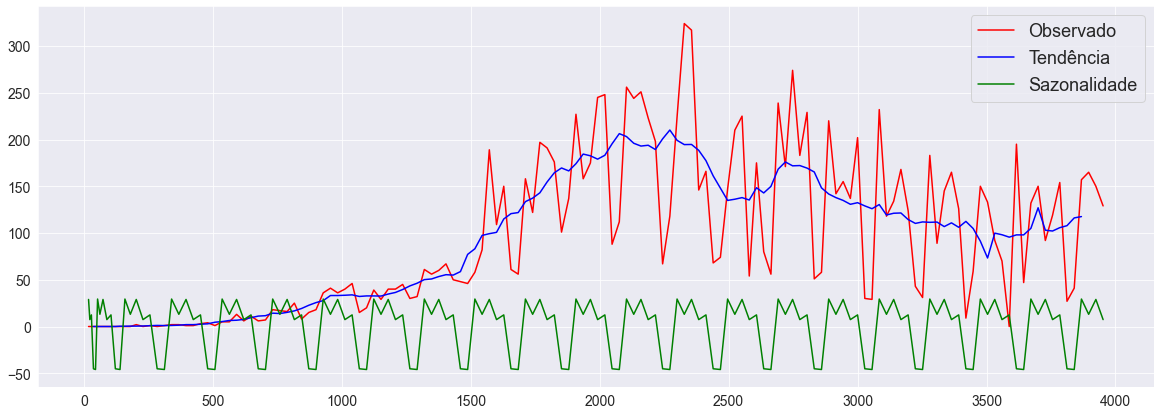

In [38]:
plotar(resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green',
      'Observado','Tendência','Sazonalidade')

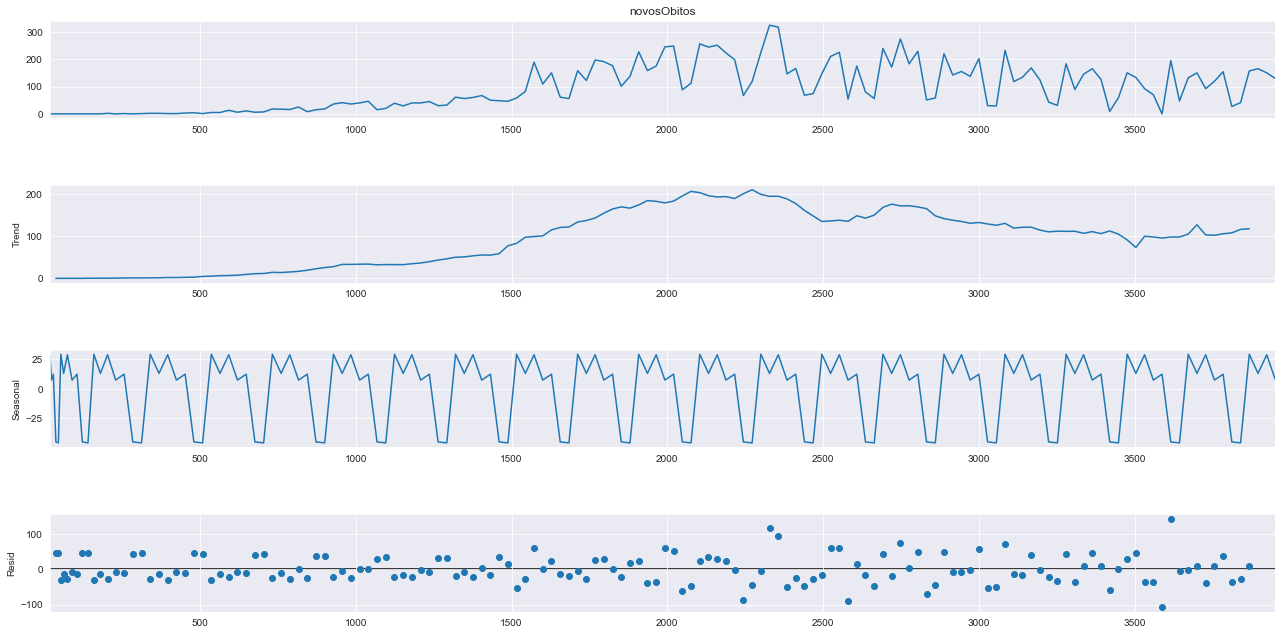

In [39]:
fig = resultados.plot()
fig.set_size_inches((20, 10))

### Comparando tendência com outros estados

In [70]:
df_mg = df[df['estado'] == 'MG']
df_sp = df[df['estado'] == 'SP']
df_mg.index = pd.to_datetime(df_mg.data)
df_sp.index = pd.to_datetime(df_sp.data)

In [71]:
resultados_sp = seasonal_decompose(df_sp.novosObitos, freq = 7)
resultados_mg = seasonal_decompose(df_mg.novosObitos, freq = 7)

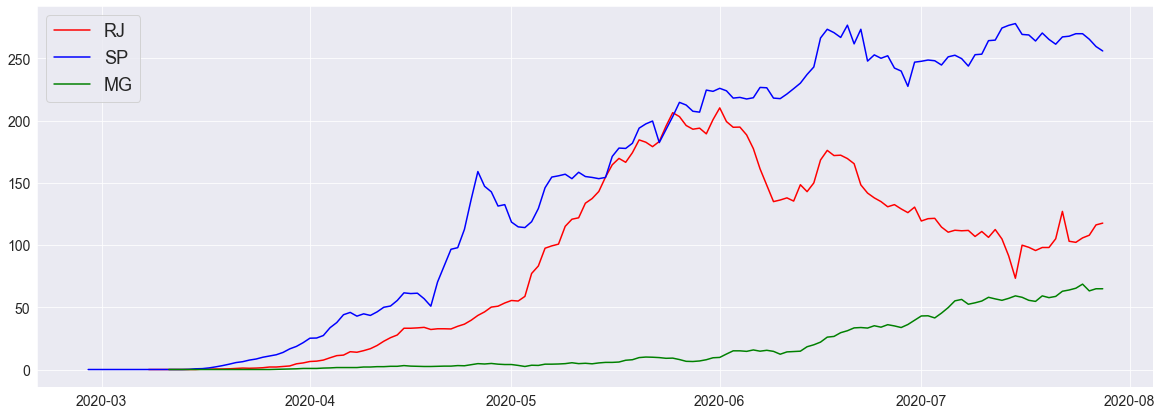

In [75]:
plotar(resultados.trend, resultados_sp.trend, resultados_mg.trend, 'red', 'blue', 'green',
      'RJ','SP','MG')

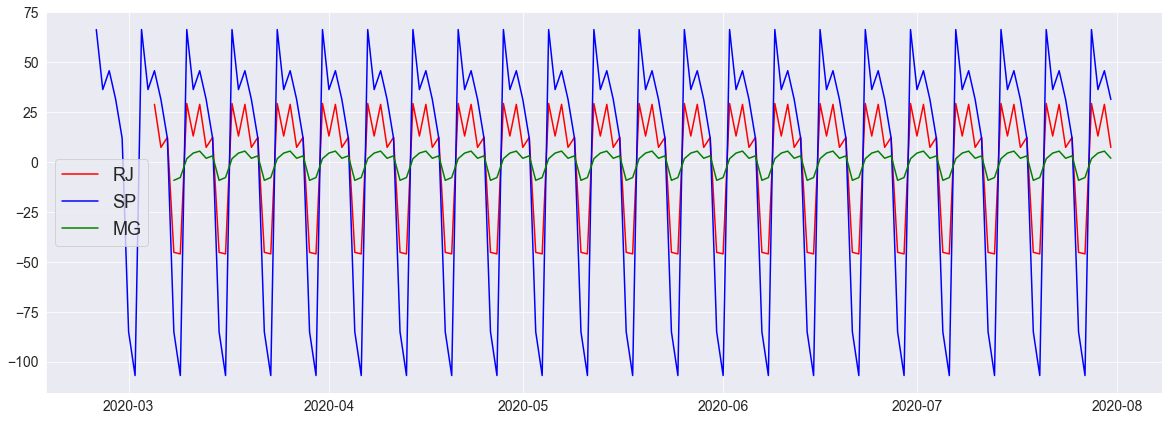

In [76]:
plotar(resultados.seasonal, resultados_sp.seasonal,resultados_mg.seasonal, 'red','blue','green',
      'RJ','SP','MG')

### Diferenciação, estacionariedade e autocorrelação dos dados de casos do RJ

DEFINIÇÕES: <p>
    Uma série temporal é dita estacionária quando ela se desenvolve no tempo aleatoriamente ao redor de uma média constante, refletindo alguma forma de equilíbrio estável.<p>
    Uma série temporal é estacionária quando suas características estatísticas (média, variância, autocorrelação) são constantes ao longo do tempo. Ou seja, as leis de probabilidade que atuam no processo não mudam com o tempo.<p>
    Podemos aplicar transformações para fazer a série se tornar estacionária. Transformações como logaritmos podem ajudar a estabilizar a variância de uma série temporal. A diferenciação, por outro lado, pode ajudar a estabilizar a média de uma série temporal, removendo as mudanças no nível de uma série temporal e, portanto, eliminando (ou reduzindo) a tendência e a sazonalidade.

In [44]:
y = df_rj['Casos']
y.head()

data
2020-03-05    1
2020-03-06    2
2020-03-07    2
2020-03-08    3
2020-03-09    3
Name: Casos, dtype: int64

Apesar de já termos ideia de que trata-se de uma série não estacionária a partir dos dados que já analisamos, iremos realizar um teste estatístico para confirmar a não estacionariedade da série, o teste ADF (Augmented Dickey-Fuller).

In [45]:
from statsmodels.tsa.stattools import adfuller
adfuller(y.dropna())

(2.9356435146482873,
 1.0,
 2,
 146,
 {'1%': -3.4759527332353084,
  '5%': -2.881548071241103,
  '10%': -2.577438765246763},
 2228.3784767156976)

In [46]:
print('p-valor:', adfuller(y.dropna())[1])

p-valor: 1.0


Como p-valor esta muito acima de 0.05 não rejeitamos a hipóstese nula de que a série é não estacionária e é dependente do tempo.

Com isso, aplicaremos então uma diferenciação na série para transformá-la em estacionária e plotaremos um gráfico para verificar como os dados se comportam antes e depois da diferenciação.

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [48]:
def plotarACF(y1, y2, y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1, ax=ax1, title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2, ax=ax2, title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3, ax=ax3, title='2ª Diferenciação')

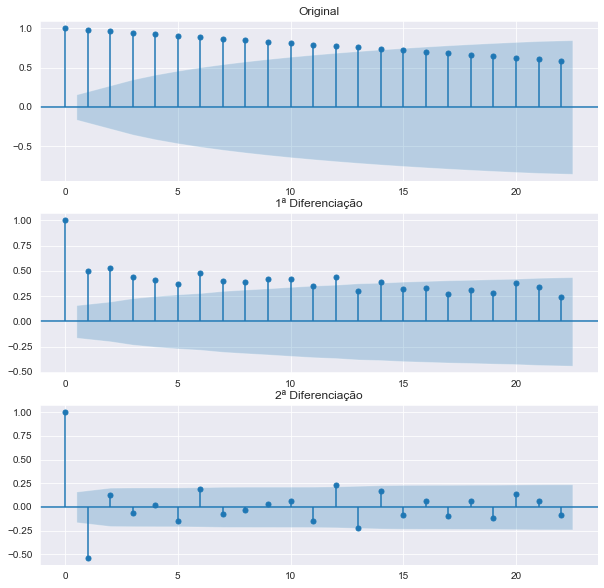

In [49]:
plotarACF(y, y.diff().dropna(), y.diff().diff().dropna())

Podemos observar que após a primeira diferenciação, os dados ainda apresentam tendência, e também observa-se um pouco de sazonalidade, pois o efeito de sazonalidade começa a importar um pouco mais na medida em que diminuímos a magnitude dos dados.<p>
Após a segunda diferenciação, observamos um valor de autocorrelação negativo, o que pode indicar que os dados foram diferenciados demais.

Vamos analisar como os dados ficaram após a primeira e segunda diferenciação.

In [50]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))

  ax1 = plt.subplot(3,1,1)
  ax1.set_title(titulo, fontsize=18, loc='left')
  ax1 = sns.lineplot(x=x, y=y1, data=dataset)
  ax1.set_ylabel('Aumento', fontsize=14)

  ax2 = plt.subplot(3,1,2)
  ax2 = sns.lineplot(x=x, y=y2, data=dataset)
  ax2.set_ylabel('1ª Diferenciação', fontsize=14)
    
  ax3 = plt.subplot(3,1,3)
  ax3 = sns.lineplot(x=x, y=y3, data=dataset)
  ax3.set_ylabel('2ª Diferenciação', fontsize=14)

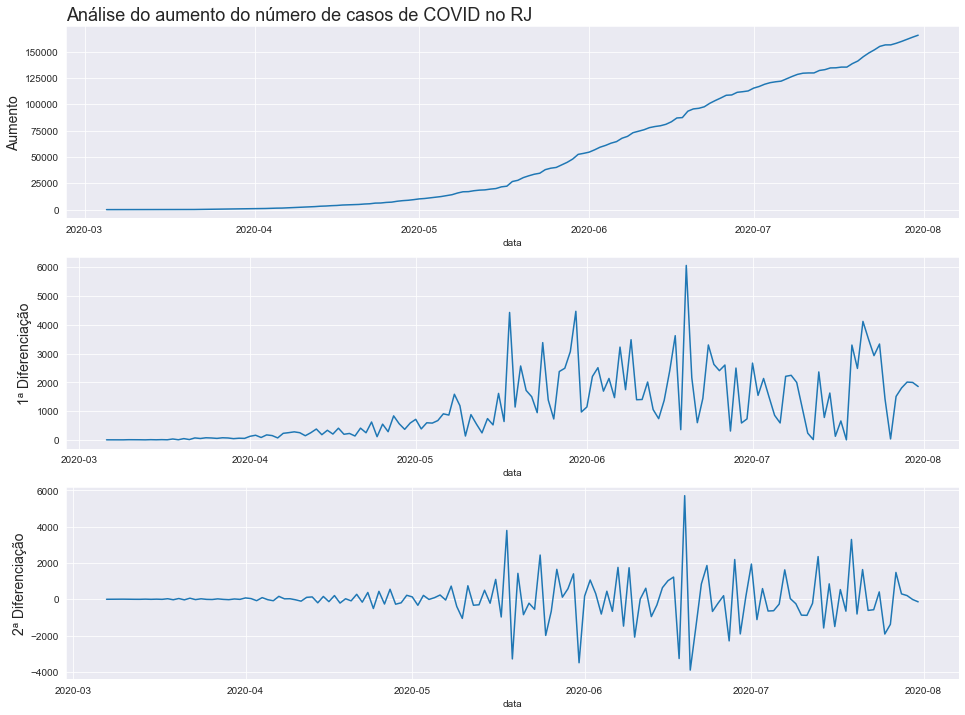

In [51]:
plot_comparacao('data', df_rj.Casos, df_rj.Casos.diff().dropna(), df_rj.Casos.diff().diff().dropna(),
               df_rj, 'Análise do aumento do número de casos de COVID no RJ')

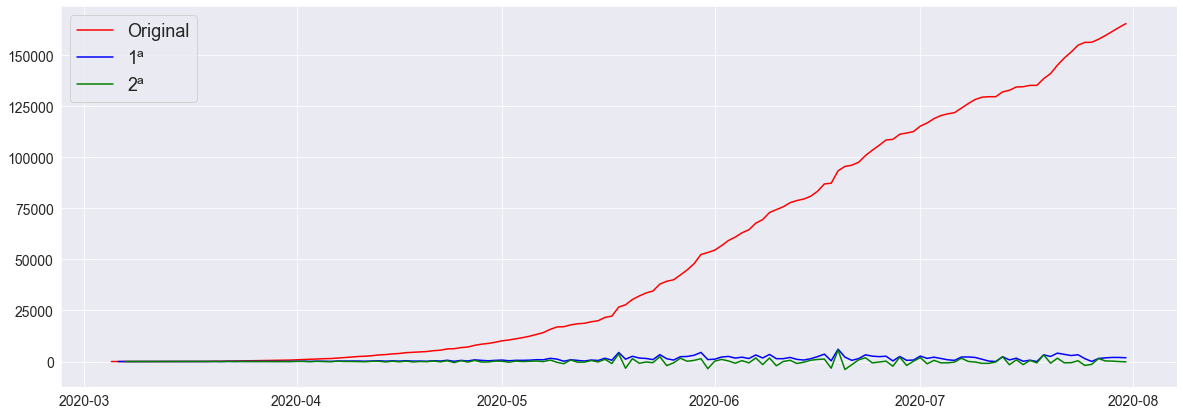

In [52]:
plotar(y,y.diff(),y.diff().diff(),'red','blue','green','Original','1ª','2ª')

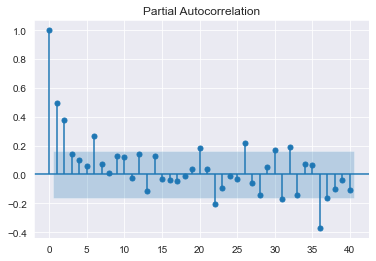

In [79]:
plot_pacf(y.diff().dropna(), lags=40)
plt.show()

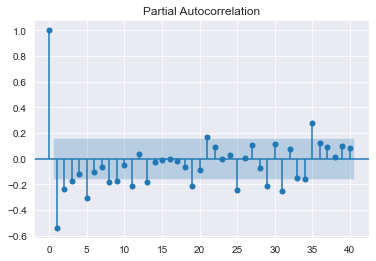

In [80]:
plot_pacf(y.diff().diff().dropna(), lags=40)
plt.show()

A partir do gráfico PACF observamos que de fato ao diferenciarmos os dados duas vezes estamos sobrediferenciando o modelo, pois temos uma grande quantidade de autocorrelação negativa, e alguns dados que ultrapassam o limite de significância (aréa azul do gráfico). <p>
    É melhor que diferenciarmos menos o modelo. Portanto, para a análise de previsão com o modelo ARIMA seguiremos com apenas a primeira diferenciação. 

### Prevendo novos casos com o modelo ARIMA

AR - Auto regressivo <p>
I - Grau de diferenciação <p>
MA - Média móvel <p>
Como vimos anteriormente, o modelo pode ter sofrido sobrediferenciação ao diferenciarmos os dados duas vezes. Definir o número de diferenciações irá impactar nos resultados dos outros parâmetros para o modelo. <p>
    Definimos também, que iríamos seguir a análise com apenas a primeira diferenciação. E assim, testaremos um primeiro modelo ARIMA com uma combinação simples de parâmetros.

#### Testando o modelo com uma combinação simples de parâmetros - ARIMA (p = 1, d = 1, q = 1)

In [53]:
from statsmodels.tsa.arima_model import ARIMA

In [54]:
modelo = ARIMA(y,order=(1,1,1))
modelo_fit = modelo.fit(disp=0)
print(modelo_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Casos   No. Observations:                  148
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1218.584
Method:                       css-mle   S.D. of innovations            907.310
Date:                Thu, 18 Aug 2022   AIC                           2445.167
Time:                        15:58:11   BIC                           2457.156
Sample:                    03-06-2020   HQIC                          2450.038
                         - 07-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1040.0772    613.677      1.695      0.090    -162.707    2242.862
ar.L1.D.Casos     0.9851      0.016     61.907      0.000       0.954       1.016
ma.L1.D.Casos    -0.8352      0.055    -

C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


AIC - Quanto menor, melhor. <p>
BIC - Quanto menor, melhor. Porém, um valor muito baixo pode significar overffiting.<p>
    

#### Testando o modelo SARIMAX com outros parâmetros

Mesmo definindo a primeira diferenciação, percebemos que os dados ainda possuem sazonalidade. Para obtermos melhores resultados, utilizaremos então o modelo SARIMAX, que já é especifícico para lidar com dados sazonais e apresenta uma melhor perfomance.

In [55]:
# Criando uma lista de combinações possíveis de parâmetros
import itertools 
p = d= q = range(0,2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

Além dos parâmetros p, d, q do modelo ARIMA, para o modelo ARIAX precisamos definir também a sazonalidade. <p>
Esta será definida como 7, devido a sazonalidade semanal como já havíamos observado anteriormente.

In [56]:
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [57]:
print('Exemplo de combinação de parâmetros para o ARIMA Sazonal')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA Sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


In [58]:
# Treinando cada modelo com as possíveis combinações
import statsmodels.api as sm
aic_lista = []
melhor_modelo = [0, 0, 0]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))
        
        # Armazenando os melhores parâmetros em uma lista
        if melhor_modelo[2] == 0:
            melhor_modelo = param, param_seasonal, results.aic
        else:
            if melhor_modelo[2] > results.aic:
                melhor_modelo = param, param_seasonal, results.aic

C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood op

C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency inform

In [59]:
aic_lista

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3772.423229220175',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3698.431674976058',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3020.6690037983653',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2907.0626054550967',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3204.8448900793264',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3092.688197739275',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2742.9738998504918',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2734.0591887623627',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3670.4515504276105',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3467.210283074436',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2862.415877583449',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2797.855362546129',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3643.655924667046',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3645.434067068362',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2662.064467658808',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2639.1801839913032',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2610.5998888805852',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2562.9001306665264',
 

In [60]:
melhor_modelo

((1, 1, 1), (0, 1, 1, 7), 2343.47368743263)

#### Analisando o melhor modelo

In [61]:
# Treinando o modelo com a melhor combinação de parâmetros
mod = sm.tsa.statespace.SARIMAX(y,
                               order = melhor_modelo[0],
                               seasonal_order = melhor_modelo[1])
results = mod.fit()

C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\PICHAU\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


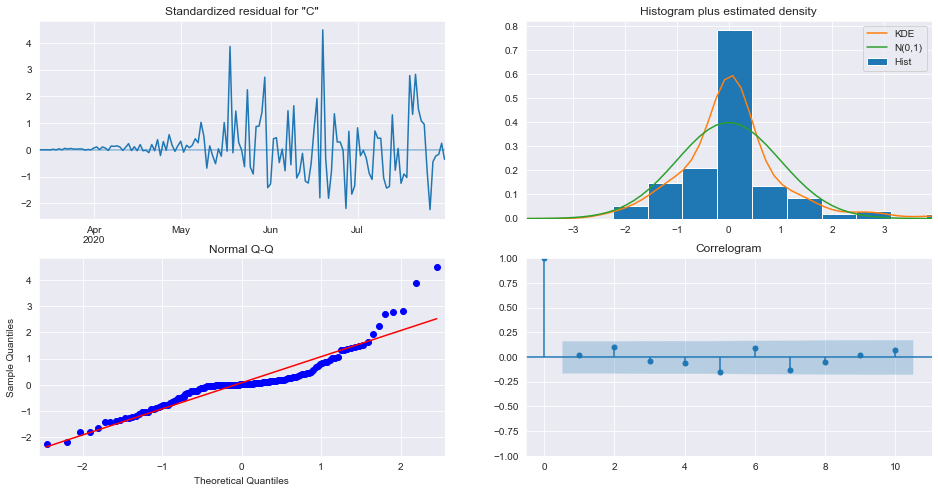

In [62]:
# Plotando e analisando os resíduos das previsões
results.plot_diagnostics(figsize=(16,8))
plt.show()

No primeiro plot, observamos a distribuição dos resíduos ao longo do tempo. Como temos um número de casos crescente, é natural que o número de resíduos também cresça ao longo do tempo. <p>
No segundo plot, temos um histograma dos resíduos. Observamos a distribuição dos resíduos (KDE, em laranja), e a distribuição normal (em verde). Nota-se que os resíduos possuem maior amplitude, mas não apresentam desvios muito grandes a esquerda ou a direita. <p>
No terceiro plot, temos o gráfico Q-Q (Quantil), comparação estatística entre quantis, quanto mais próximo o modelo se aproxima dos dados, mais próximos os pontos azuis estarão em cima da linha vermelha. <p>
No quarto plot, temos o correlograma, mostrando a autocorrelação dos resíduos. Podemos oservar que elas estão extremamente baixas, o que significa que de fato o nosso modelo conseguiu transformar a série em estacionária antes de realizar as previsões.<p>
    
Concluímos então que os resultados estão dentro do esperado, e podemos seguir a análise com a realização das previsões para os dados futuros.

#### Realizando previsões com dados existentes (treino)

In [63]:
# Realizando as previsões com dados de treino
pred = results.get_prediction(start=pd.to_datetime('2020-07-01'),dynamic=False)
# Criando um dataset com o intervalo de confiança das previsões, para avaliar o modelo
pred_ic = pred.conf_int()
pred_ic

,lower Casos,upper Casos
2020-07-01,112690.846960,116331.536012
2020-07-02,115208.213103,118847.194255
2020-07-03,117155.307460,120791.779789
2020-07-04,118904.953204,122541.045725
2020-07-05,120284.336256,123920.174247
2020-07-06,121087.042589,124722.714510
2020-07-07,121613.359929,125248.927410
2020-07-08,124110.649523,127746.154669
2020-07-09,126104.171168,129738.162087
2020-07-10,128595.687110,132227.436885


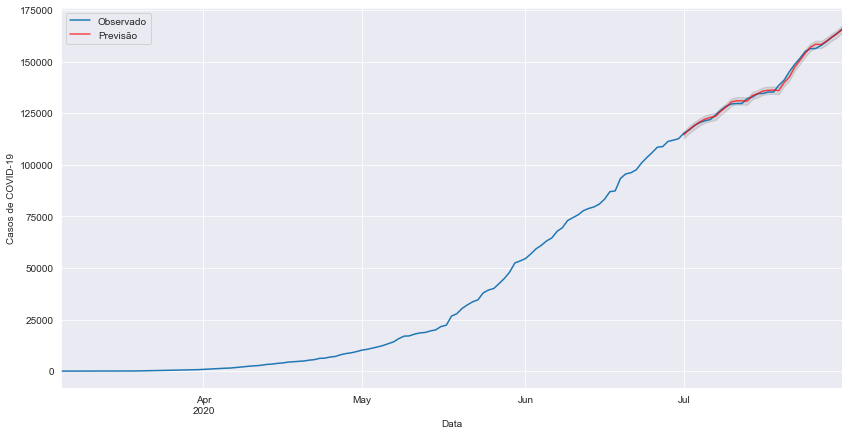

In [64]:
# Plotando os resultados reais
ax = y['2020':].plot(label='Observado')
# Plotando a média das previsões
pred.predicted_mean.plot(ax=ax, label='Previsão', color='r', alpha=0.7, figsize=(14,7))
# Plotando os intervalos de confiança em cinza
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.1)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.legend()
plt.show()

Como realizamos as previsões com dados existentes do dataset (treino), o intervalo de confiança é bem pequeno, a expectativa é que este intervalo sempre aumenta a medida em que tentamos realizar uma previsão um tempo maior.

#### Realizando previsões com dados não existentes (teste)

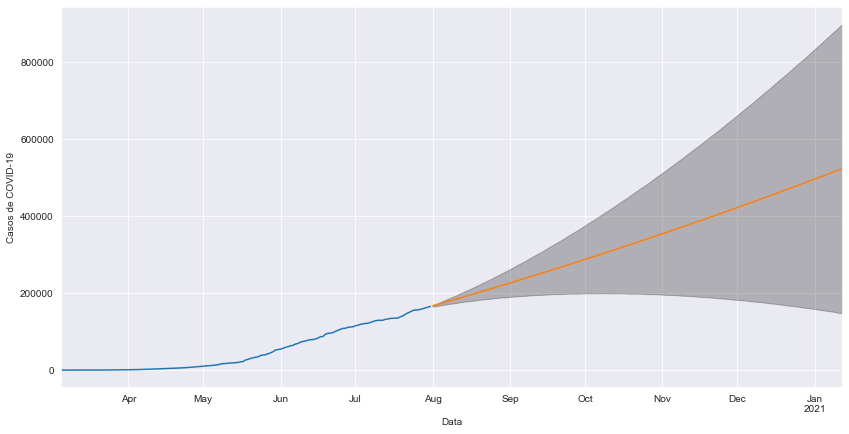

In [65]:
pred_uc = results.get_forecast(steps=165)
pred_ic = pred_uc.conf_int()
ax = y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Casos de COVID-19')
plt.show()

#### Comparando as previsões com o número de casos reais

In [66]:
# Carregando o dataset com dados até janeiro de 2021
df_att = pd.read_csv('cases-brazil-states-att.csv')
df_att = df_att[df_att['state'] == 'RJ']
df_att = df_att.rename(columns = {'date':'data'})
df_att['data'] = pd.to_datetime(df_att['data']).dt.date
df_att.index = df_att['data']
df_att.tail()

,epi_week,data,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
data,,,,,,,,,,,,,,,,,,
2021-01-07,101,2021-01-07,Brazil,RJ,TOTAL,224,26292,4669,452758,26292,452758,152.28547,2622.41236,0.05807,416229.0,NaN,2313502.0,13399.9979
2021-01-08,101,2021-01-08,Brazil,RJ,TOTAL,188,26480,1517,454275,26480,454275,153.37438,2631.19896,0.05829,421587.0,NaN,2313502.0,13399.9979
2021-01-09,101,2021-01-09,Brazil,RJ,TOTAL,224,26704,5591,459866,26704,459866,154.67181,2663.58250,0.05807,426213.0,NaN,2313502.0,13399.9979
2021-01-10,102,2021-01-10,Brazil,RJ,TOTAL,45,26749,1061,460927,26749,460927,154.93245,2669.72790,0.05803,427837.0,NaN,2313502.0,13399.9979
2021-01-11,102,2021-01-11,Brazil,RJ,TOTAL,22,26771,634,461561,26771,461561,155.05988,2673.40008,0.05800,428991.0,NaN,2313502.0,13399.9979


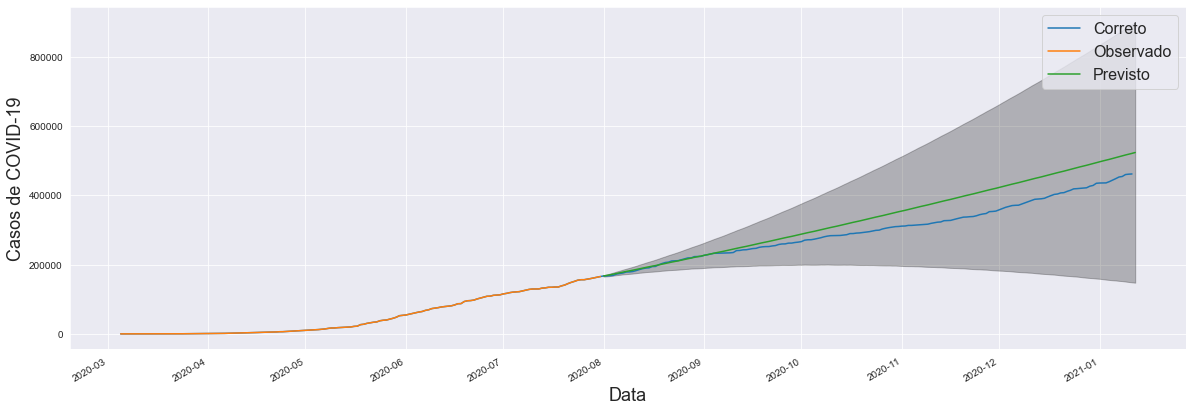

In [67]:
x = df_att['totalCases']
plt.figure(figsize=(20,7))
fig = plt.plot(x, label='Correto')
ax = y.plot(label='Observado')
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data', fontsize=18)
ax.set_ylabel('Casos de COVID-19', fontsize=18)
plt.legend(fontsize=16)
plt.show()

Ao comprarmos nossas previsões com os dados reais, percebemos que o intervalos de confiança cresce bastante ao longo do tempo, isso mostra que quanto maior o tempo, maior a incerteza sobre as previsões realizadas. O valor que tentamos prever, 165 dias, é muito tempo se tratando de previsões de séries temporais, pois estas são muitos voláteis.<p>
Apesar disto, observa-se que número de casos reais difere pouco dos valores previstos, sinalizando que as medidas adotadas a fim de evitar o comportamento exponencial dos novos casos foram pouco efetivas.